# Порівняння методів побудови графів

## Мета роботи
Метою є побудова графу, що репрезентує спрощену мережу електростанцій України, та порівняння трьох різних методів візуалізації графів:
1. `spring_layout`
2. `kamada_kawai_layout`
3. Географічні координати

## Вступ
Візуалізація мереж має велике значення для аналізу зв'язків та структури даних. У випадку енергетичних мереж, важливою є не тільки структура мережі, але й взаємне розташування об'єктів.
Тому важливо, щоб відстані між станціями були пропорційними до їх фактичних значень, що дозволяє отримати більш реалістичну картину мережі.

## Дані та методи
### 1. Дані про електростанції
Для побудови графу були використані географічні координати (широта і довгота) та потужності електростанцій. Станції відображені у вигляді вузлів, а відстані між ними — у вигляді ребер з відповідними вагами (у кілометрах). Вузли різних типів станцій мають різне кольорове забарвлення для наглядності.

### 2. Обрані методи побудови графу
Було розглянуто три методи побудови графу:
- **`spring_layout`**: Метод, що імітує пружинну модель, де відстані між вузлами розраховуються на основі сили зв'язків між ними. Це дозволяє отримати граф з мінімальною енергією, що відображає структуру мережі.
  
- **`kamada_kawai_layout`**: Інший метод, який також оптимізує розташування вузлів, мінімізуючи напругу у зв'язках. Цей метод часто використовується для зображення більш збалансованих графів.

- **Географічні координати**: Розташування вузлів графу відповідно до їх фактичних географічних координат.


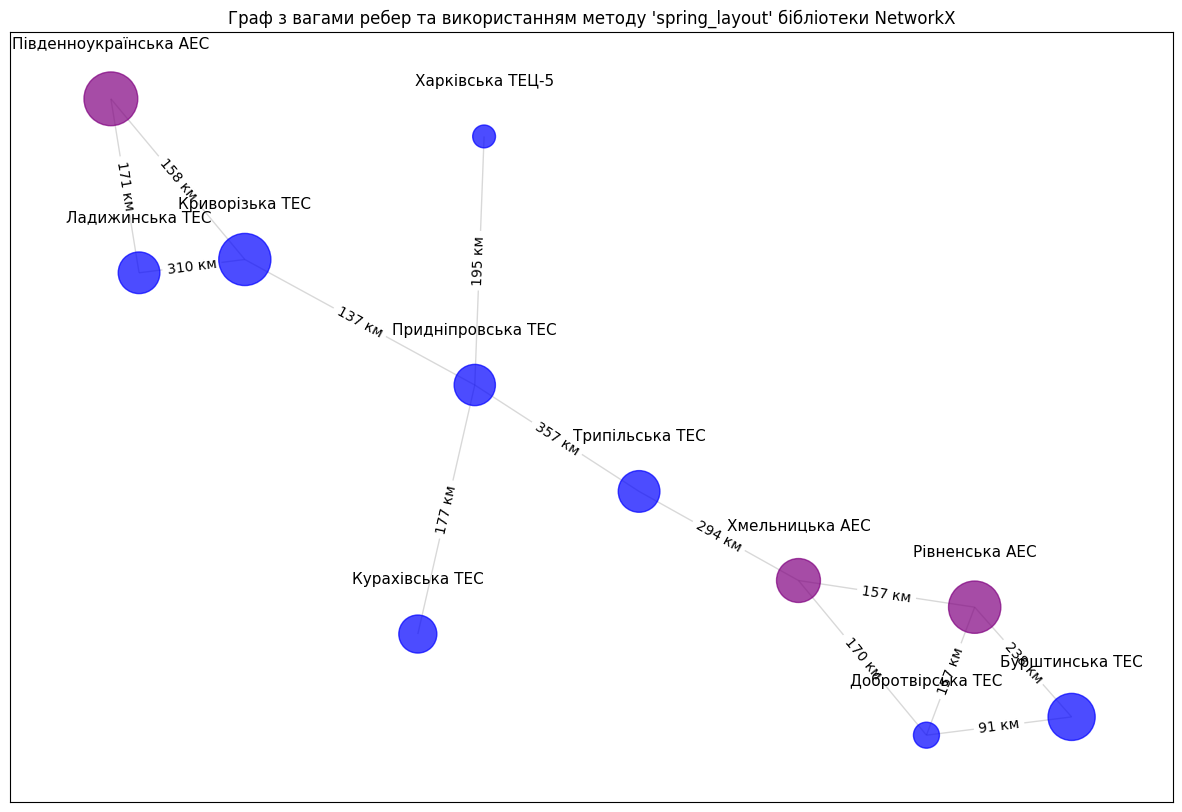

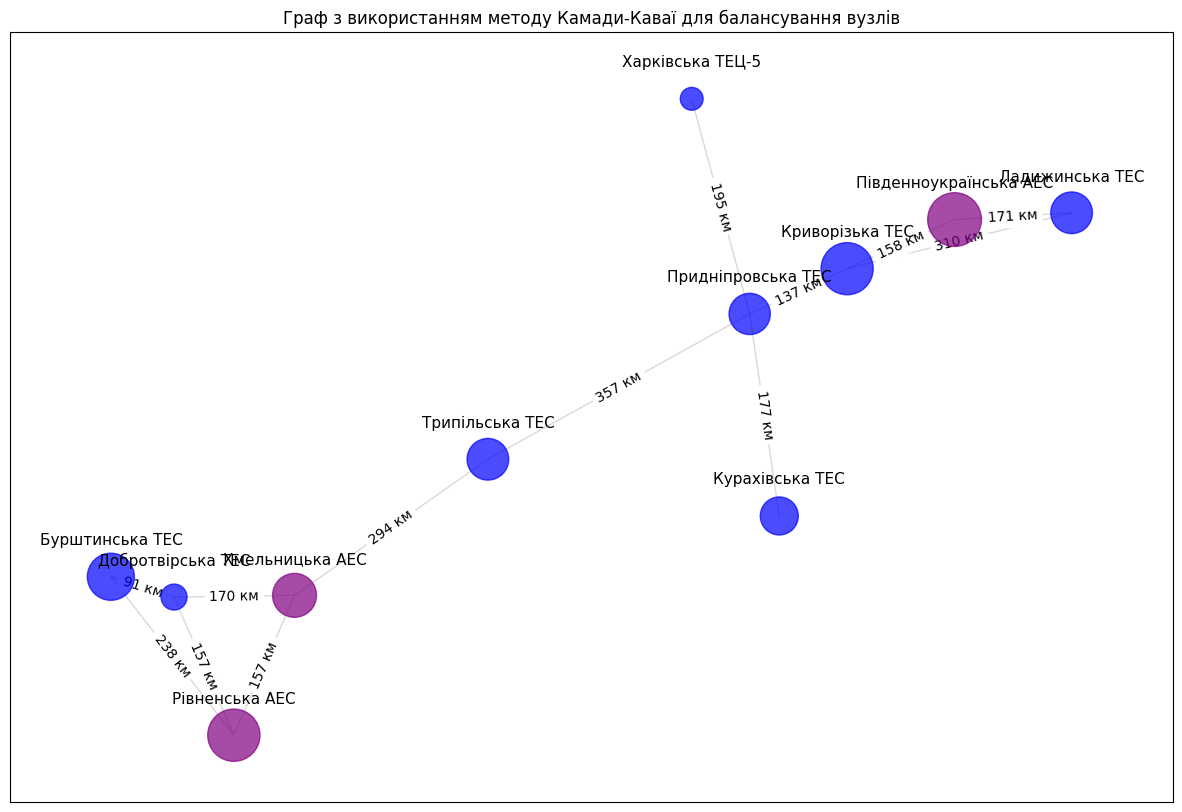

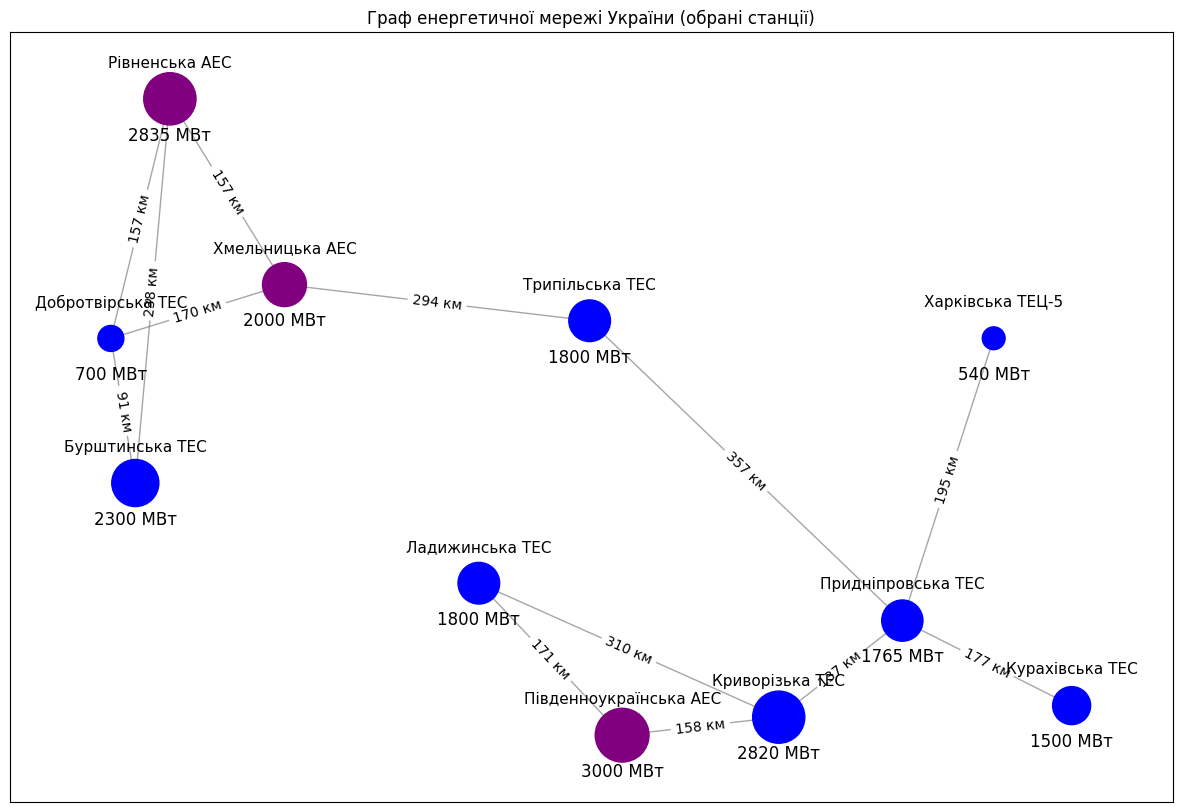

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
from math import e, radians, cos, sin, sqrt, atan2

# Функція для обчислення відстані між двома точками за географічними координатами
def haversine_own(lat1, lon1, lat2, lon2):
    R = 6371.0  # Радіус Землі в кілометрах
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat / 2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

# Дані про станції - назва, широта, довгота, потужність
stations = {
    "Бурштинська ТЕС": (49.2066, 24.6255, 2300),
    "Добротвірська ТЕС": (50.0046, 24.2952, 700),
    "Криворізька ТЕС": (47.9142, 33.3233, 2820),
    "Курахівська ТЕС": (47.9780, 37.2827, 1500),
    "Ладижинська ТЕС": (48.6536, 29.2692, 1800),
    "Придніпровська ТЕС": (48.4472, 34.9943, 1765),
    "Південноукраїнська АЕС": (47.8148, 31.2065, 3000),
    "Рівненська АЕС": (51.3272, 25.0928, 2835),
    "Трипільська ТЕС": (50.1023, 30.7673, 1800),
    "Харківська ТЕЦ-5": (50.0056, 36.2292, 540),
    "Хмельницька АЕС": (50.3016, 26.6419, 2000)
}

# Додавання ребер (обрані)
edges = [
    ("Бурштинська ТЕС", "Добротвірська ТЕС"),
    ("Бурштинська ТЕС", "Рівненська АЕС"),
    ("Добротвірська ТЕС", "Хмельницька АЕС"),
    ("Добротвірська ТЕС", "Рівненська АЕС"),
    ("Курахівська ТЕС", "Придніпровська ТЕС"),
    ("Криворізька ТЕС", "Ладижинська ТЕС"),
    ("Криворізька ТЕС", "Південноукраїнська АЕС"),
    ("Криворізька ТЕС", "Придніпровська ТЕС"),
    ("Ладижинська ТЕС", "Південноукраїнська АЕС"),
    ("Придніпровська ТЕС", "Трипільська ТЕС"),
    ("Рівненська АЕС", "Хмельницька АЕС"),
    ("Трипільська ТЕС", "Хмельницька АЕС"),
    ("Харківська ТЕЦ-5", "Придніпровська ТЕС"),
]

# Ініціалізація графу
G = nx.Graph()

# Додавання вузлів
for station, (lat, lon, capacity) in stations.items():
    G.add_node(station, pos=(lon, lat), capacity=capacity)
# Позиції вузлів
pos = nx.get_node_attributes(G, 'pos')
# Розміри вузлів
node_sizes = [G.nodes[station]['capacity'] / 2 for station in G.nodes]
# Вибір кольорів для вузлів з урахуванням атомних електростанцій
node_colors = ['purple' if "АЕС" in station else 'blue' for station in G.nodes]
# Підписи станцій з відступами зверху
name_labels = {station: station for station in G.nodes}
name_label_pos = {station: (coords[0], coords[1] + 0.2) for station, coords in pos.items()}
# Підписи потужностей з офсетами знизу вузлів
capacity_labels = {station: f"{G.nodes[station]['capacity']} МВт" for station in G.nodes}
capacity_label_pos = {station: (coords[0], coords[1] - 0.2) for station, coords in pos.items()}


# Додавання до ребер ваги, що дорівнює відстані між вузлами
for edge in edges:
    station1, station2 = edge
    lat1, lon1, _ = stations[station1]
    lat2, lon2, _ = stations[station2]
    distance = haversine_own(lat1, lon1, lat2, lon2)
    G.add_edge(station1, station2, weight=distance)
# Додавання до ребер підписів, що відображають їх вагу (відстань між станціями)
edge_labels = {(u, v): f"{int(d['weight'])} км" for u, v, d in G.edges(data=True)}


# 1. Побудова графу з використанням функції spring_layout з бібліотеки NetworkX ("стандартний" метод)
pos_weighted = nx.spring_layout(G, weight="weight")
# Побудова графу
plt.figure(figsize=(15, 10))
nx.draw_networkx_edges(G, pos_weighted, edge_color='grey', alpha=0.3)
nx.draw_networkx_nodes(G, pos_weighted, node_size=node_sizes, node_color=node_colors, alpha=0.7)
nx.draw_networkx_labels(G, {station: (coords[0], coords[1] + 0.05) for station, coords in pos_weighted.items()}, name_labels, font_size=11)
nx.draw_networkx_edge_labels(G, pos_weighted, edge_labels)
plt.title("Граф з вагами ребер та використанням методу 'spring_layout' бібліотеки NetworkX")
plt.show()


# 2. Побудова графу з використанням функції kamada_kawai_layout з бібліотеки NetworkX
pos_weighted = nx.kamada_kawai_layout(G, weight='weight')
# Інвертуємо порядок вузлів для зворотнього відображення,
# у даному випадку це допоможе зобразити вузли ближче до їх географічного розташування
pos_weighted_reversed = {node: (-coords[0], -coords[1]) for node, coords in pos_weighted.items()}
# Побудова графу
plt.figure(figsize=(15, 10))
nx.draw_networkx_edges(G, pos_weighted_reversed, edge_color='grey', alpha=0.3)
nx.draw_networkx_nodes(G, pos_weighted_reversed, node_size=node_sizes, node_color=node_colors, alpha=0.7)
nx.draw_networkx_labels(G, {station: (coords[0], coords[1] + 0.05) for station, coords in pos_weighted_reversed.items()}, name_labels, font_size=11)
nx.draw_networkx_edge_labels(G, pos_weighted_reversed, edge_labels)
plt.title("Граф з використанням методу Камади-Каваї для балансування вузлів")
plt.show()


# 3. Побудова графу на основі фактичних географічних координат
plt.figure(figsize=(15, 10))
nx.draw_networkx_edges(G, pos, edge_color='grey', alpha=0.7)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors)
nx.draw_networkx_labels(G, name_label_pos, name_labels, font_size=11)
nx.draw_networkx_labels(G, capacity_label_pos, capacity_labels, font_size=12)
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.title("Граф енергетичної мережі України (обрані станції)")
plt.show()


## Висновки

1. **`spring_layout`**: Цей метод розміщує вузли практично довільно, базуючись на моделі пружин, де довжини ребер залежать від сили зв'язків. Проте, відстані між вузлами не передають шуканої пропорційності та не відповідають реальним географічним відстаням. Це робить даний метод недостатньо інформативним для поставленої метиь.

2. **`kamada_kawai_layout`**: Цей метод забезпечує більш збалансоване розташування вузлів, орієнтуючись на мінімізацію "напруги" в зв'язках. Хоча цей підхід може бути корисним для візуалізації структури мережі, він також не завжди забезпечує точну пропорційність відстаней. Метод підходить для аналізу топологічних характеристик мережі, але для точного відображення географії він менш ефективний.

3. **Географічні координати**: Цей метод є найбільш точним, оскільки вузли графу розташовані відповідно до їх реальних географічних координат. Відстані між вузлами точно відображають реальні відстані між об'єктами, що робить цей підхід найбільш інформативним для аналізу географічних мереж. Варто зазначити, що бібліотека Matplotlib автоматично налаштовує видиму область графіку залежно від діапазону координат вузлів, забезпечується оптимальне відображення всіх елементів.

## Можливості покращення

1. **Відображення графів на карті**: Хоча `networkx` добре підходить для побудови та аналізу графів, він не підтримує відображення їх на карті. Для візуалізації графів на реальній карті можна використовувати бібліотеку `folium`. Це дозволить інтегрувати мережу безпосередньо з картографічними даними, що забезпечить більш наочне відображення мережі.

2. **Інтерактивність**: Додавання інтерактивних можливостей, таких як панорамування, масштабування та інтерактивні підказки, може покращити користувацький досвід при роботі з графом. Для цього можна використовувати бібліотеки, такі як `plotly` або `bokeh`, які дозволяють створювати інтерактивні графи з динамічними елементами.
